# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [4]:
df.describe()

#Mean for age - 29.6. Stdev: 14.52
#Mean for fare - 34.69 Stdev: 52.91

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

In [0]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

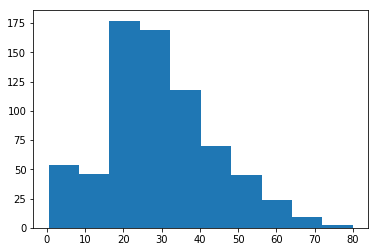

In [6]:
plt.hist(df.age)

#Of the 714 passengers, about 50 were under 18. Most were in their 20s and 30s, 

(array([577.,  89.,  28.,   2.,   9.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

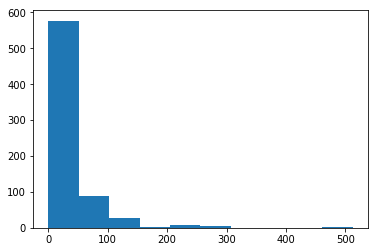

In [7]:
plt.hist(df.fare)
# Most of the passengers paid below 50 pounds.

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [8]:
def test():
  dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
  breakers = [random.choice(dishwashers) for _ in range(5)]
  return breakers.count('Carl')

tests = [test() for _ in range(100000)]

#plt.hist(tests)

mean(tests), stdev(tests)

(1.00082, 0.8948448664843257)

In [9]:
standard_score = (2-mean(tests))/ stdev(tests)
print (standard_score)


1.1165957781325684


In [23]:
p_value=(sum (test>=2 for test in tests)/len(tests))
p_value < .05
#print (p_value)

#There's a 26% probability that it was just bad luck. 

False

# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [11]:
import statistics
dieroll = [random.randint(1,6) + random.randint(1,6) for _ in range(100000)]
 
mean(dieroll), stdev(dieroll)

(7.00168, 2.406290730554145)

What is the standard score (z score) of rolling a 10?

In [12]:
standard_score_dice = (10-mean(dieroll)/stdev(dieroll))
print (standard_score_dice)


7.090260162209251


What is the probability of rolling a 10 or higher?

The probability of rolling a dice 10 or higher is 8.388 %


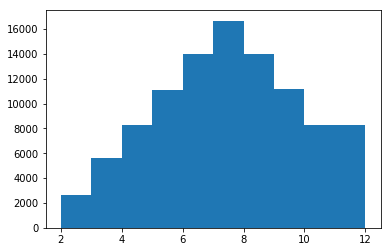

In [13]:
plt.hist(dieroll)
np

def rollthedice(simulations=100000):
  count = 0
  for _ in range(simulations):
    dieroll = random.randint(1,6) + random.randint(1,6)
    if dieroll >10:
      count = count+1
  return count/simulations*100

print ('The probability of rolling a dice 10 or higher is',rollthedice(),"%")


# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round((len(x) - 1) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [15]:
effect_sizes = [mean(bootstrap_sample(apples)) for i in range(10000)]
percentile(effect_sizes, 97.5)

0.6

... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 6, 3, 3, 3, 1, 1, 6, 1, 1, 6, 3, 3, 3, 1, 1, 6, 3, 3, 3, 591]

In [17]:
effect_sizes1 = [mean(bootstrap_sample(pumpkins)) for i in range(10000)]
percentile(effect_sizes1, 97.5)

83.36363636363636